## Import Libraries

In [31]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import *
from keras.models import Sequential
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
import os
import warnings
warnings.filterwarnings('ignore')

## Reading Images from Path

In [15]:
data_path=('/kaggle/input/brain-tumor-mri-data/brain-tumor-mri-dataset')
image_classes=os.listdir(data_path)
print(image_classes)

['pituitary', 'notumor', 'meningioma', 'glioma']


## Visualize First Image From Categories

In [16]:
def plot_images(image_classes):
    plt.figure(figsize=(14,14))

    for i,category in enumerate(image_classes):
        image_path = data_path + '/' + category   ##Creaitng Category Path
        images_in_folder= os.listdir(image_path)    ## Reading Images in each Category

        first_image=images_in_folder[0]
        first_image_path=image_path + '/' + first_image     ##Creaitng First Image Path

        img=image.load_img(first_image_path)  ## Loading it
        img_array=image.img_to_array(img)/255   ## Normalize Pixels in range [0:1]

        plt.subplot(4,4,i+1)   
        plt.imshow(img_array)
        plt.title(category)
        plt.axis('off')

plt.show()

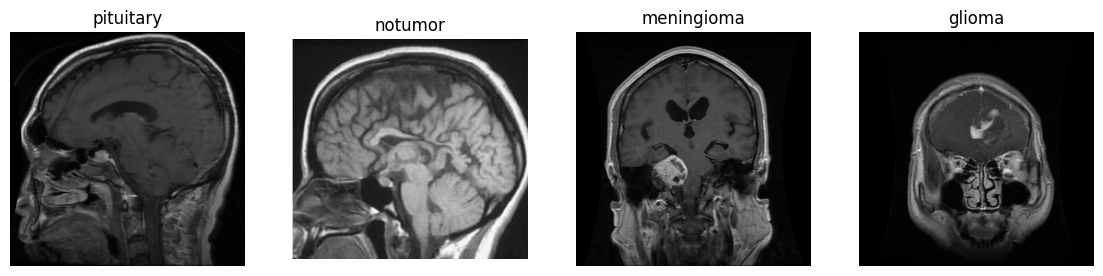

In [17]:
## Ploting The first_img in Categories
plot_images(image_classes)

## Images Preprocessing

In [18]:
image_generator=ImageDataGenerator(rescale=1/255,validation_split=0.3)

## Splitting The Data

In [19]:
train_data=image_generator.flow_from_directory('/kaggle/input/brain-tumor-mri-data/brain-tumor-mri-dataset',
                                               target_size=(200,120),
                                               batch_size=32,
                                               class_mode='categorical',
                                               shuffle=True,
                                               subset='training'
)

Found 5008 images belonging to 4 classes.


In [20]:
test_data=image_generator.flow_from_directory('/kaggle/input/brain-tumor-mri-data/brain-tumor-mri-dataset',
                                              target_size=(200,120),
                                              batch_size=1,
                                              class_mode='categorical',
                                              shuffle=True,
                                              subset='validation'

)

Found 2145 images belonging to 4 classes.


## CNN Model

In [21]:
model=Sequential()

### Constructing The Model

In [22]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[200,120,3]))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))  ## Dropot Layer After Pooling

model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))    ## Dropot Layer After Poolin

## Add Flatten & Dense Layers
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))  ## Dropot Layer After Dense


model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))

## ADD Output Layer
model.add(Dense(4,activation='softmax'))


### Model Summary

In [23]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 200, 120, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 100, 60, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 60, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 100, 60, 64)         │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 50, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 50, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 96000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      12,288,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,324,548 (47.01 MB)

 Trainable params: 12,324,548 (47.01 MB)

 Non-trainable params: 0 (0.00 B)

### Model Compile

In [24]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

### Trainnig The Model

In [25]:
history=model.fit(train_data,epochs=10,validation_data=test_data,verbose=1
                         )

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 25s 128ms/step - accuracy: 0.4609 - loss: 1.2725 - val_accuracy: 0.7399 - val_loss: 0.5971
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 107ms/step - accuracy: 0.7975 - loss: 0.4901 - val_accuracy: 0.8648 - val_loss: 0.3523
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 103ms/step - accuracy: 0.8920 - loss: 0.2880 - val_accuracy: 0.8984 - val_loss: 0.3016
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 103ms/step - accuracy: 0.9297 - loss: 0.1833 - val_accuracy: 0.8942 - val_loss: 0.2905
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 110ms/step - accuracy: 0.9459 - loss: 0.1426 - val_accuracy: 0.8942 - val_loss: 0.3358
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 104ms/step - accuracy: 0.9710 - loss: 0.0923 - val_accuracy: 0.9221 - val_loss: 0.2418
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 106ms/step - accuracy: 0.9763 - loss: 0.0710 - val_accuracy: 0.9305 - val_loss: 0.2684
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 103ms/step - accuracy: 0.9833 - loss: 0

## History Visualization

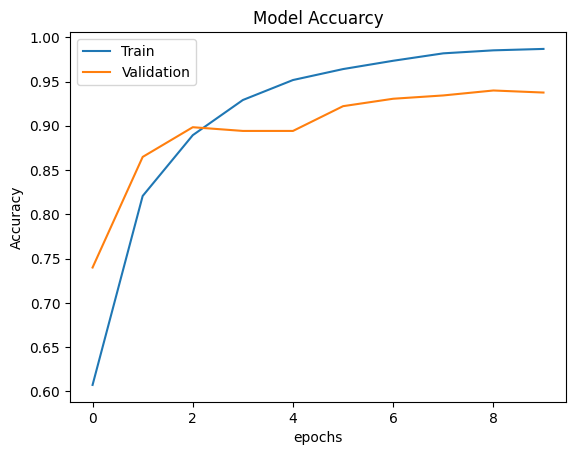

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuarcy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'])
plt.show()

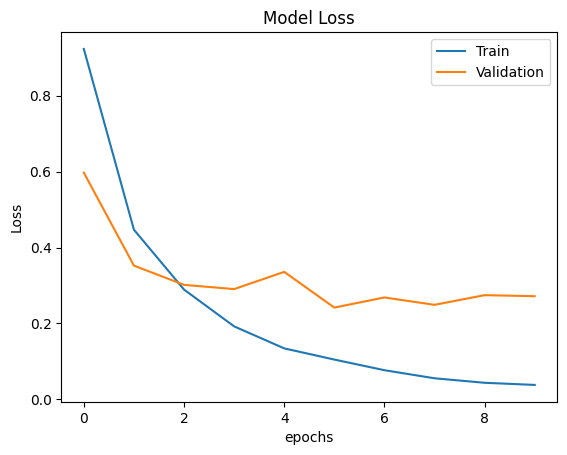

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['Train','Validation'])
plt.show()

## Accuarcy & Loss on Trainning Data

In [32]:
train_loss, train_accuracy = model.evaluate(train_data)

print(f"Accuracy on train data: {train_accuracy:.2%} | Loss: {train_loss:.4f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.9975 - loss: 0.0079
Accuracy on train data: 99.86% | Loss: 0.0062


## Accuarcy & Loss on Test Data

In [33]:
test_loss, test_accuracy = model.evaluate(test_data)

print(f"Accuracy on train data: {test_accuracy:.2%} | Loss: {test_loss:.4f}")

2145/2145 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9345 - loss: 0.2708
Accuracy on train data: 93.75% | Loss: 0.2717
